# Introducción a Python para ciencias e ingenierías (notebook 4)

Ing. Martín Gaitán

Twitter: `@tin_nqn_`

** Registrá tu asistencia a esta clase **
### http://goo.gl/forms/olbkNwX700

**Links útiles**

Repositorio del curso:

### http://bit.ly/cursopy

Python "temporal" online:

### http://try.jupyter.org

- Descarga de [Python "Anaconda"](http://continuum.io/downloads#py34)
- Resumen de [sintaxis markdown](https://github.com/jupyter/strata-sv-2015-tutorial/blob/master/resources/Working%20With%20Markdown%20Cells.ipynb)



## Matplotlib, un gráfico vale más que mil palabras

Python es un lenguaje muy completo pero aunque es muy grande, su librería estándar no es infinita. Por suerte hay miles y miles de bibliotecas extra para complementar casi cualquier aspecto en el que queramos aplicar Python. En algunos ámbitos, con soluciones muy destacadas.

Para hacer gráficos existe Matplotlib http://matplotlib.org/ . Ya viene instalado con la versión completa de Anaconda.

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot

In [3]:
x = [0.1*i for i in range(-50, 51)]
y = [x_i**2 for x_i in x]

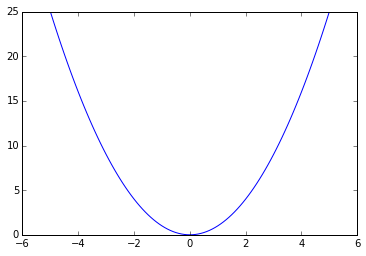

In [4]:
pyplot.plot(x,y)

Los gráficos emergentes son buenos porque tiene la barra de herramientas y podemos guardarlos en excelente calidad a golpe de mouse. Pero en los notebooks podemos poner los gráficos directamente incrustados

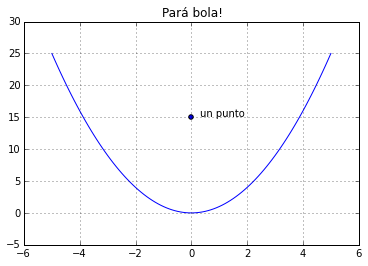

In [29]:
pyplot.plot(x,y)
pyplot.title('Pará bola!')
pyplot.scatter([0], [15])
pyplot.annotate(s='un punto', xy=(0, 15), xytext=(0.3, 15.2))
pyplot.grid()

Matplotlib sabe hacer muchísimos tipos de gráficos!

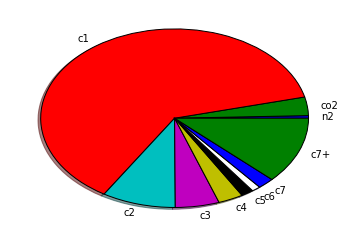

In [26]:
import csv

with open('data/near_critical_oil.csv') as csv_file:
    reader = csv.reader(csv_file)
    critical_oil = [line for line in reader]   #o list(reader)

components = [c for (c, f) in critical_oil[1:]]
fraction = [float(f) for (c, f) in critical_oil[1:]]
# el ; evita el output de la celda
pyplot.pie(fraction, labels=components, shadow=True);

In [13]:
import random
campana = [random.gauss(0, 0.5) for i in range(1000)]

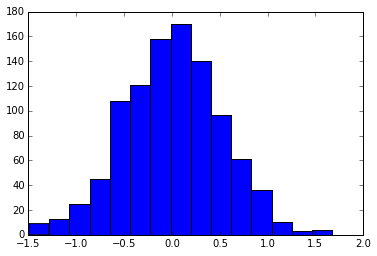

In [14]:
pyplot.hist(campana, bins=15);

### La "papa" de matplotlib

   **Este es el algoritmo más importante para graficar con matplotlib**


1. Ir a http://matplotlib.org/gallery
2. Elegir el gráfico de ejemplo que más se parezca a lo que queremos lograr
3. Copiar el código del ejemplo y adaptarlo a nuestros datos y gustos

![](files/img/lo_importante.png)


### Ejercicios

1. Dada la función para el cálculo de raices de una ecuación de segundo grado [implementada](https://gist.githubusercontent.com/mgaitan/cb0ad9778453607acb49/raw/8d85d2184a4b46b48440cf5b5d95062801a08cce/baskara.py) en clases anteriores, crear una función que dados los coeficientes grafique la parábola y denote las raices con puntos rojos y el valor de X en cada una. 

2. Basado en el [ejemplo de grafico de torta](http://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html) de la galería, adaptar el ejemplo que grafica "near_critical_oil.csv" para que no se vea "ovoide" y la porción correspondiente a "C2" quede separada. Agregar un título al gráfico


Antes de seguir con Matplotlib debemos aprender el corazón del Python Cientifico: **Numpy**

## Numpy, todo es un array

El paquete **numpy** es usado en casi todos los cálculos numéricos usando Python. Es un paquete que provee a Python de estructuras de datos vectoriales, matriciales y de rango mayor, de alto rendimiento. Está implementado en C y Fortran, de modo que cuando los cálculos son vectorizados (formulados con vectores y matrices), el rendimiento es muy bueno.

In [32]:
import numpy as np

El pilar de numpy (y toda la computación científica basada en Python) es el tipo de datos `ndarray`, o sea arreglos de datos multidimensionales.

¿Otra secuencia más? ¿pero que tenían de malo las listas?

Las listas son geniales paro guardar **cualquier tipo de objeto**, pero esa flexibilidad las vuelve ineficientes cuando lo que queremos es almacenar datos homogéneos

In [30]:
%timeit [0.1*i for i in range(10000)]    # %timeit es otra magia de ipython

1000 loops, best of 3: 1.03 ms per loop


In [34]:
%timeit np.arange(0, 1000, .1)    # arange es igual a range, pero soporta paso de tipo flotante y devuelve un array

10000 loops, best of 3: 37.2 µs per loop


In [45]:
%%timeit -o
X = range(10000000)
Y = range(10000000)
Z = [(x + y) for x,y in zip(X,Y)]

1 loops, best of 3: 939 ms per loop


<TimeitResult : 1 loops, best of 3: 939 ms per loop>

In [46]:
%%timeit -o
X = np.arange(10000000)
Y = np.arange(10000000)
Z = X + Y

10 loops, best of 3: 43 ms per loop


<TimeitResult : 10 loops, best of 3: 43 ms per loop>

In [47]:
__.best / _.best

21.835120069048784

Existen varias formas para inicializar nuevos arrays de numpy, por ejemplo desde

- Listas o tuplas
- Usando funciones dedicadas a generar arreglos numpy, como `arange`, `linspace`,`ones`, `zeros` etc.
- Leyendo datos desde archivos

In [12]:
v = np.array([1,2,3,4])
v

In [13]:
# una matriz: el argumento de la función array function es una lista anidada de Python
M = np.array([[1, 2],
              [3, 4]])
M

In [14]:
type(v), type(M)

### Dimensiones, tamaño, tipo, forma

Los ndarrays tienen distintos atributos. Por ejemplo

In [15]:
v.ndim, M.ndim    # cantidad de dimensiones

In [16]:
v.shape, M.shape  # tupla de "forma". len(v.shape) == v.ndim

In [17]:
v.size, M.size   # cantidad de elementos.

In [18]:
M.T   # transpuesta!

A diferencia de las listas, los *arrays* tambien **tienen un tipo homogéneo**

In [19]:
v.dtype     #

Se puede definir explicitamente el tipo de datos del array

In [20]:
np.array([[1, 2], [3, 4]], dtype=complex)

Una gran ventaja del atributo `shape` es que podemos cambiarlo. Es decir, reacomodar la distrución de los elementos (por supuesto, sin perderlos en el camino)

In [99]:
A = np.arange(0, 12)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [100]:
A.shape = 3, 4
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

El método `reshape` es otra manera de definir la forma de un array, generando uno nuevo array (a diferencia de `A.shape` que simplemente es otra vista del mismo array)

In [101]:
A = np.arange(12).reshape((3,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

### Vistas

Esto es porque numpy en general no mueve los elementos de la memoria y en cambio usa **vistas** para mostrar los elementos de distinta forma. Es importante entender esto porque incluso los slicings son vistas.

In [49]:
a = np.arange(10)
b = a[::2]  # todo de 2 en 2
b

array([0, 2, 4, 6, 8])

In [50]:
b[0] = 12
a  # chan!!!

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

En cambio

In [51]:
c = np.arange(10)
d = c[::2].copy()
d[0] = 12
c

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Una forma de saber si un array es "base" o hereda los datos de otro array (es una vista), es verificar el atributo `base`

In [55]:
b.base is a and a.base is None

True

### Otras funciones constructuras de arrays


Además de `arange` hay otras funciones que devuelven arrays. Por ejemplo `linspace`, que a diferencia de `arange` no se da el tamaño del paso, sino la cantidad de puntos que queremos en el rango

In [26]:
np.linspace(0, 2 * np.pi, 100)      # por defecto, incluye el limite.

In [27]:
_.size   # en cualquier consola, python guarda el ultimo output en la variable _

In [28]:
matriz_de_ceros = np.zeros((4,6))
matriz_de_ceros

In [29]:
np.ones((2, 4))

Pero numpy no sólo nos brinda los arrays. Los conceptos claves que aporta son *vectorización* y *broadcasting*

### Vectorización

La **vectorización** define que las operaciones aritméticas entre arrays de igual forma se realizan implicitamente **elemento a elemento**, y por lo tanto hay una **ausencia de iteraciones explícitas y de indización**. 
La vectorización tiene muchas ventajas:

* El código vectorizado es más conciso y fácil de leer.
* Menos líneas de código habitualmente implican menos errores.
* El código se parece más a la notación matemática estándar (por lo que es más fácil,
por lo general, corregir código asociado a construcciones matemáticas
* La vectorización redunda en un código más "pythónico"

In [30]:
a = np.array([3, 4.3, 1])
b = np.array([-1, 0, 3.4])
c = a * b
c

¡Basta de bucles `for` for todos lados!

## Broadcasting


El **broadcasting** (*difusión*) es el término que describe el comportamiento de las operaciones con arrays de distinta forma. Con ciertas restricciones, se trata de que el array de menores dimensiones se "difunde" al más grande, siempre que tengan formas compatibles

En Numpy todas las operaciones adoptan por defecto un comportamiento de este tipo (no sólo las operaciones
aritméticas sino las lógicas, las funcionales y las de nivel de bits)

La forma más obvia de observar el broadcasting es cuando se opera un array con un escalar

In [67]:
a = np.array([1., 2., 3.])
b = 2.
a * b

array([ 2.,  4.,  6.])

podemos interpretar que el escalar  `b` es un array adimensional que "se estira" para ser compatible con las dimensiones de `a`

![](files/img/image001.gif)

#### Regla general del broadcasting

       Dos arrays son compatibles para operar via *broadcasting* si sus dimensiones 
       (de atrás hacia adelante) son iguales o alguna es 1. 


En otras palabras:

      Debe cumplirse que el `shape` de uno sea "sufijo" del `shape` del otro array (1 es comodin) 


In [72]:
a = np.array([[ 0.0, 0.0, 0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0])

a.shape, b.shape   # son compatibles para broadcasting

((4, 3), (3,))

In [73]:
a + b

array([[  1.,   2.,   3.],
       [ 11.,  12.,  13.],
       [ 21.,  22.,  23.],
       [ 31.,  32.,  33.]])

![](files/img/image002.gif)

In [75]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])

#fails
a + b

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

Pero podemos elevar la dimensionalidad de `a` (agregar una dimensión sin cambiar los elementos) para poder operar entre los dos arrays

In [108]:
a =  a.reshape((4,1))   # equivalente a  a[:,np.newaxis]
b = np.array([1.0, 2.0, 3.0])
a + b

array([[  1.,   2.,   3.],
       [ 11.,  12.,  13.],
       [ 21.,  22.,  23.],
       [ 31.,  32.,  33.]])

![](files/img/image004.gif)

### Ejercicio

1. Crear una array de 10x10 donde cada fila va del 0 al 9 (tip: implementar via broadcasting y también ver la función `np.tile`)
2. Dado un vector `[0 20 32 100 123]` que indica las distancias entre los pueblos sobre una ruta, encontrar la "matriz de distancias" (que da la distancia absoluta entre cualquier par de pueblos)



In [53]:
ruta = np.array([0, 20, 32, 100, 123])

np.abs(ruta - ruta.reshape(ruta.size,1))

array([[  0,  20,  32, 100, 123],
       [ 20,   0,  12,  80, 103],
       [ 32,  12,   0,  68,  91],
       [100,  80,  68,   0,  23],
       [123, 103,  91,  23,   0]])

### Slicing extendido

El funcionamiento básico del indexado y el slicing funciona con `ndarrays` igual que con cualquier secuencia.

In [32]:
ruido = np.random.random(1000)   # 1000 numeros aleatorios entre [0, 1)

In [33]:
ruido[0] == ruido[-1000]

In [34]:
ruido[999] == ruido[-1]

In [35]:
ruido[1:5]

In [36]:
ruido[0:10] = np.zeros((10,))  # claro que los arrays son mutables!

Pero veamos algo más. Supongamos que tenemos una matriz de 3x3

In [45]:
m = np.arange(0, 9).reshape(3,3)
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [104]:
m[0]       # primer indice: filas

array([0, 1, 2])

In [105]:
m[0:2]

array([[0, 1, 2],
       [3, 4, 5]])

Pero la sintaxis se extiende de una manera eficiente y compacta.

In [106]:
%timeit m[1][1]      # buuuuh!!!

The slowest run took 56.00 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 224 ns per loop


In [107]:
%timeit m[1,1]    # yeaaaa!!!

The slowest run took 61.51 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 110 ns per loop


In [42]:
m[:,0]      # quiero la primer columna

In [43]:
m[0:2, 0:2]   # la submatriz superior izquierda de 2x2

Se acuerdan que en el slicing común había un tercer parametro opcional que era el paso? Funciona acá también

In [44]:
m[::2, ::2]    # esquinas

In [180]:
a = np.arange(60).reshape(6, 10)
a[:,:6]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [168]:
a[:,2:3]

array([[ 2],
       [12],
       [22],
       [32],
       [42],
       [52]])

Como resumen

![](http://www.tp.umu.se/~nylen/pylect/_images/numpy_indexing.png)

### Ejercicios

1. Dado el array del gráfico (`np.arange(60).reshape(6, 10)[:,:6]`):
   
 1.1 Obtener la segunda columna exceptuando el valor de la primera y la última fila
 
 1.2 Obtener toda la submatriz central de 4x4 
 
 1.3 "Rodear" el array con ceros (obteniendo una matriz de 6x6)
 
 1.4 Reconfigurar la forma para que cada "fila" resultante se convierta en una matriz de 2x3
  
2. Crear la estructura de datos de un [Cubo de Rubik](https://es.wikipedia.org/wiki/Cubo_de_Rubik) en su estado inicial: 6x3x3 donde cada una de las 6 "caras" *i* tiene todos sus elementos con valor *i*




In [48]:
np.zeros([6,3,3]) + np.arange(6)[:,np.newaxis, np.newaxis]

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]],

       [[ 3.,  3.,  3.],
        [ 3.,  3.,  3.],
        [ 3.,  3.,  3.]],

       [[ 4.,  4.,  4.],
        [ 4.,  4.,  4.],
        [ 4.,  4.,  4.]],

       [[ 5.,  5.,  5.],
        [ 5.,  5.,  5.],
        [ 5.,  5.,  5.]]])

In [35]:
a = np.arange(60).reshape(6, 10)[:,:6]

a[0::2,0::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [184]:
np.diag(1+np.arange(4),k=-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

  (tip: investigar la función `diag()` y `rot90()`

In [47]:
aleatorio = np.random.normal?

In [48]:
aleatorio = np.random.normal

In [49]:
np.zeros((10,10)) + np.arange(10)

### Funciones de reducciones/agregación

numpy tiene muchas funciones y/o métodos de "reducción", que sumarizan información del array. Por ejemplo: sumatoria, media, maximo y minimo, etc.

Estas funciones se pueden utilizar para todo el array o acotadas por eje con el parámetro `axis`)



In [132]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

Las funciones más importantes también se implementan como métodos

In [133]:
x.sum()

10

Cuando tenemos un array de más de una dimensión podemos aplicar la función por ejes 

![](files/img/reductions.png)

In [136]:
x = np.array([[1, 1], [2, 2]])
x.sum(axis=0), x.sum(axis=1)

(array([3, 3]), array([2, 4]))

In [137]:
np.mean(x, axis=1)

array([ 1.,  2.])

In [23]:
y = np.array([[1, 3, 2], [3, 4, -1]])
np.amin(axis=1), y.max()

(array([ 1, -1]), 4)

### Funciones de transformación

La función `diag` poner un array 1D en diagonal (convirtiendolo en 2D) o bien extraer una diagonal de un array 2D dado.

In [195]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Podemos decirle qué diagonal con un offset entero

In [59]:
np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [196]:
np.diag(np.arange(30).reshape(5,6))

array([ 0,  7, 14, 21, 28])

`rot90` permite rotar un array multidimensional

In [63]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [64]:
np.rot90(A)

array([[2, 5, 8],
       [1, 4, 7],
       [0, 3, 6]])

In [65]:
np.rot90(A, k=2)  # rotamos 180º

array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])

#### Ejercicio 


1. Crear un array 2D de 6x5 de la siguiente forma


    array([[0, 0, 0, 0, 5],
           [0, 0, 0, 4, 0],
           [0, 0, 3, 0, 0],
           [0, 2, 0, 0, 0],
           [1, 0, 0, 0, 0],
           [0, 0, 0, 0, 0]])

In [194]:
np.diag??

### Meshgrids

Una funcion importante es `meshgrid`, que permite crear una "rejilla" para definir dominios de más de una variable a partir de arrays unidemensionales. 


Por ejemplo, si quisieramos definir un dominio de $\R3$ (x,y)

In [209]:
x = np.linspace(-3, 3, 7)    
y = np.linspace(-3, 2, 6)
print(x, y)
grid = xx, yy = np.meshgrid(x, y)
print(xx.shape, yy.shape)
grid

[-3. -2. -1.  0.  1.  2.  3.] [-3. -2. -1.  0.  1.  2.]
(6, 7) (6, 7)


[array([[-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.]]),
 array([[-3., -3., -3., -3., -3., -3., -3.],
        [-2., -2., -2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.]])]

![](img/meshgrid.png)

Entonces podemos aplicar una función para este dominio, por ejemplo:  $f(x,y) = (xy)^2$

In [205]:
z = (xx * yy) * 2
z

array([[ 18.,  12.,   6.,  -0.,  -6., -12., -18.],
       [ 12.,   8.,   4.,  -0.,  -4.,  -8., -12.],
       [  6.,   4.,   2.,  -0.,  -2.,  -4.,  -6.],
       [ -0.,  -0.,  -0.,   0.,   0.,   0.,   0.],
       [ -6.,  -4.,  -2.,   0.,   2.,   4.,   6.],
       [-12.,  -8.,  -4.,   0.,   4.,   8.,  12.]])

y graficamos, por ejemplo, las curvas de nivel

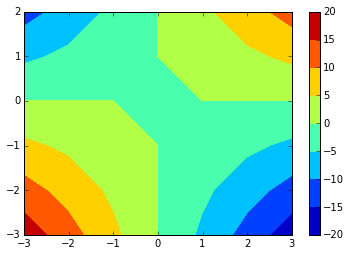

In [206]:
plt.contourf(x, y, z)
plt.colorbar();

In [2]:
import numpy as np

#### Ejercicio

1. Basado en el ejemplo de [wireframe 3D](http://matplotlib.org/examples/mplot3d/wire3d_demo.html), graficar $z = xe^{-(x^2 + y^2)}$ con $x, y \in [-2, 2]$ con una resolución de 100 puntos en cada eje



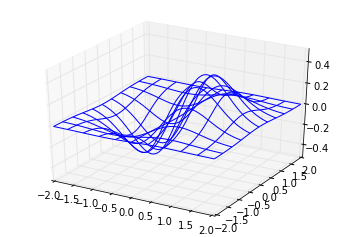

In [7]:
%matplotlib inline


x = y = np.linspace(2, -2, 100)
xx,yy = np.meshgrid(x, y)
z = xx*np.exp(-(xx**2 + yy**2))


from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xx, yy, z, rstride=10, cstride=10)

ax

### Más sobre indizado y rebanado

In [170]:
a = np.random.random_integers(0, 30, 10)   # 10 enteros aleatorios entre 0 y 30
a

array([15, 22, 12, 10, 19,  7, 27, 26,  6, 28])

Numpy permite multiples indices por eje

Esto se conoce como *fancy indexing*

In [171]:
a[[1, 2, 4, 1]]    # selecciona el elemento 1, 2, el 4 y  de nuevo el 1

array([22, 12, 19, 22])

Por otro lado, podemos indexar elementos a traves con un array (o cualquier secuencia array-like) de **tipo booleano**. Esto es, hacer una **máscara**

In [172]:
a[np.array([True, False, True, True, False, False, True, False, False])]

array([15, 12, 10, 27])

Pero por otro lado sabemos que via broadcasting podemos obtener un array booleano 

In [173]:
a > 15    # qué elementos de a son mayores a 10 ?

array([False,  True, False, False,  True, False,  True,  True, False,  True], dtype=bool)

Por lo tanto, podemos "filtrar" los valores que cumplan determinada condición en un array

In [174]:
a[a > 10]

array([15, 22, 12, 19, 27, 26, 28])

(Este tipo de slicing especial **crea copias**, no vistas. Usar cuando lo amerite.)


Si en vez de los valores que cumplen una condición, queremos las posiciones, podemos usar la función `where`

In [175]:
np.where(a > 15)     # devuelve las posiciones.

(array([1, 4, 6, 7, 9]),)

Además, la función where funciona como estructura ternaria a nivel arrays

In [177]:
b = 0
# para cada i-elemento a[i] si True, si no b[i] (o constante)
np.where(a > 10, a, b)   

array([15, 22, 12,  0, 19,  0, 27, 26,  0, 28])

Selecciones avanzadas:

![](http://scipy-lectures.github.io/_images/numpy_fancy_indexing.png)

### Lectura desde texto y archivos

Como numpy se especializa en manejar números, tiene muchas funciones para crear arrays a partir de información numérica a partir de texto o archivos (como los CSV, por ejemplo).

In [9]:
a_desde_str = np.fromstring("""1.0 2.3   3.0 4.1
-3.1 2  5.0 4.5""", sep=" ", dtype=float)
a_desde_str.shape = (2, 4)
a_desde_str

array([[ 1. ,  2.3,  3. ,  4.1],
       [-3.1,  2. ,  5. ,  4.5]])

Para cargar desde un archivo existe la función `loadtxt`. Por ejemplo tenemos el archivo `data/critical.dat` que es el resultado del cálculo de una linea crítica global para un sistema químico binario.

In [14]:
!head data/critical.dat

T(K)     P(bar)   d(mol/L)   x(1)
 CRI
 304.2100   73.8300    8.7568  0.000000 0.10000E+01
 304.2056   73.8318    8.7570  0.000050 0.99995E+00   3   1
 304.2011   73.8340    8.7572  0.000117 0.99988E+00   2   1
 304.1920   73.8384    8.7577  0.000250 0.99975E+00   2   1
 304.1740   73.8472    8.7586  0.000517 0.99948E+00   2   1
 304.1379   73.8649    8.7604  0.001050 0.99895E+00   2   1
 304.0657   73.9002    8.7640  0.002117 0.99788E+00   2   1
 303.9211   73.9706    8.7711  0.004250 0.99575E+00   2   1


In [11]:
np.loadtxt?

Vemos que el patrón es en columnas separadas por espacios en blanco y las dos primeras filas son headers

In [80]:
cri_data = np.loadtxt('data/critical.dat', skiprows=2, usecols=[0, 1, 2, 3])
cri_data.shape

(211, 4)

Por defecto, devuelve una matriz 2D `numero_lineas` x `columnas`, o sea, la fila 0 es la primer linea de números

In [81]:
cri_data[:, 0]

array([ 304.21  ,  304.2056,  304.2011,  304.192 ,  304.174 ,  304.1379,
        304.0657,  303.9211,  303.6309,  303.2894,  302.9461,  302.6013,
        302.2547,  301.9064,  301.5565,  301.2048,  300.8514,  300.4962,
        300.1394,  299.7807,  299.4203,  299.0581,  298.6941,  298.3283,
        297.9606,  297.5911,  297.2198,  296.8466,  296.4716,  296.0946,
        295.7158,  295.335 ,  294.9524,  294.5677,  294.1812,  293.7927,
        293.4022,  293.0097,  292.6152,  292.2187,  291.8201,  291.4195,
        291.0169,  290.6122,  290.2054,  289.7965,  289.3855,  288.9724,
        288.5572,  288.1398,  287.7202,  287.2984,  286.8745,  286.4484,
        286.02  ,  285.5894,  285.1566,  284.7215,  284.2841,  283.8444,
        283.4025,  282.9582,  282.5116,  282.0627,  281.6114,  281.1577,
        280.7017,  280.2432,  279.7824,  279.3192,  278.8535,  278.3854,
        277.9148,  277.4417,  276.9662,  276.4882,  276.0077,  275.5246,
        275.0391,  274.551 ,  274.0603,  273.5671, 

Si directamente queremos los vectores (las columnas), podemos pedir que "desempaque" las columnas

In [17]:
t, p, d, x = np.loadtxt('data/critical.dat', skiprows=2, usecols=[0, 1, 2, 3], unpack=True)   # o loadtxt().T

In [18]:
t

array([ 304.21  ,  304.2056,  304.2011,  304.192 ,  304.174 ,  304.1379,
        304.0657,  303.9211,  303.6309,  303.2894,  302.9461,  302.6013,
        302.2547,  301.9064,  301.5565,  301.2048,  300.8514,  300.4962,
        300.1394,  299.7807,  299.4203,  299.0581,  298.6941,  298.3283,
        297.9606,  297.5911,  297.2198,  296.8466,  296.4716,  296.0946,
        295.7158,  295.335 ,  294.9524,  294.5677,  294.1812,  293.7927,
        293.4022,  293.0097,  292.6152,  292.2187,  291.8201,  291.4195,
        291.0169,  290.6122,  290.2054,  289.7965,  289.3855,  288.9724,
        288.5572,  288.1398,  287.7202,  287.2984,  286.8745,  286.4484,
        286.02  ,  285.5894,  285.1566,  284.7215,  284.2841,  283.8444,
        283.4025,  282.9582,  282.5116,  282.0627,  281.6114,  281.1577,
        280.7017,  280.2432,  279.7824,  279.3192,  278.8535,  278.3854,
        277.9148,  277.4417,  276.9662,  276.4882,  276.0077,  275.5246,
        275.0391,  274.551 ,  274.0603,  273.5671, 

In [84]:
t.size

211

Podemos graficar algo sencillo

In [85]:
%matplotlib inline

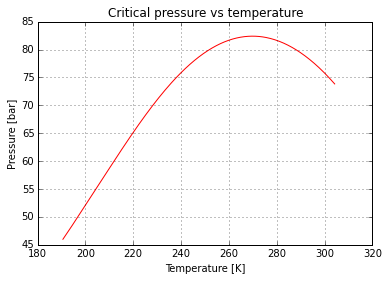

In [19]:
from matplotlib import pyplot
pyplot.plot(t, p, 'r')   # el tercer parámetro es el formato
pyplot.title('Critical pressure vs temperature')
pyplot.grid()
pyplot.xlabel('Temperature [K]')
pyplot.ylabel('Pressure [bar]')
# el punto y coma evita el output
pyplot.show();

### Otras herramientas de numpy

Encontrar raices de un polinomio


In [60]:
## tanto trabajo con nuestra función "baskara" y ya estaba hecho!
np.roots([2, 2, 2])

array([-0.5+0.8660254j, -0.5-0.8660254j])

In [62]:
# encima funciona para grado n
np.roots([1j, -4+0.4j, 18, -np.pi, 0])  # polinomio de grado 5!

array([-3.01556495 -5.38277801e+00j,  2.43369801 +1.38394115e+00j,
        0.18186694 -1.16314504e-03j,  0.00000000 +0.00000000e+00j])

Resolver un sistema de ecuaciones lineales  `Ax = b`

In [64]:
A = np.array([[1, 2], [0.5, -2]])
b = np.array([4, 5.2])

x = np.linalg.solve(A, b)
x

array([ 6.13333333, -1.06666667])

Encontrar la inversa de una matriz

In [65]:
A = np.array([[1,2],[3,4]])
invA = np.linalg.inv(A)
invA

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Producto punto

In [66]:
np.dot(A,invA)   # equivalente  a @ invA  en py3.5

array([[  1.00000000e+00,   1.11022302e-16],
       [  0.00000000e+00,   1.00000000e+00]])

### Ejercicios

- Encontrar las raices para el polinomio $$f(x) = \frac{1}{4}(x^3 + 3x^2 − 6x − 8)$$ y grafique con x entre [-3, 3]
- Resuelva el siguiente sistema de ecuaciones

  $$\begin{array} - -x + z = -2\\ 2x - y + z = 1 \\ -3x + 2y -2z = -1 \end{array}$$

### Matplolib orientado a objeto


Hasta ahora hemos usado `pyplot`, el módulo de `matptlotlib` que emula la forma de uso (la API) de Matlab. En este modo cada función que invocamos **afecta un estado interno** en el que podemos ir "acumulando" cambios (por ejemplo, el título, la etiqueta de los ejes, etc)

Este tipo de funcionamiento es práctico y fácil, pero limitado, porque es totalmente "lineal" (procedural) . Para mejorar las prestaciones y la posibilidad de "tocar" todo lo que queramos, tenemos que usar el **modo "orientado a objetos"**. Este modo es un poco más verborrágico pero también más explícito y potente. En general se usa una mezcla entre la "practicidad" de `pyplot` (modo procedural) y la orientación a objetos. Veamos un ejemplo

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'list'>
<class 'matplotlib.text.Text'>


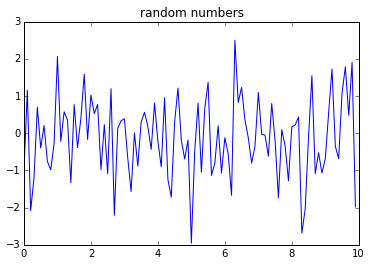

In [87]:
from matplotlib import pyplot as plt
t = x = np.arange(0, 10, 0.1)
y = np.random.randn(t.size)

fig = plt.figure()      # con una funcion de pyplot creamos un objeto tipo Figure.
print(type(fig))
ax = fig.add_subplot(1, 1, 1)  # en la posicion 1-1 creamos un Subplot en nuestro objeto fig (que tendrá solo un plot)
print(type(ax))
lines = ax.plot(t, y)      # en ese objeto plot graficamos x vs y
print(type(lines))
t = ax.set_title('random numbers')    # y al mismo plot le ponemos un titulo
print(type(t))
plt.show()    # por ultimo mostramos el grafico

Supongamos que queremos graficar muchas curvas en el mismo Subplot.

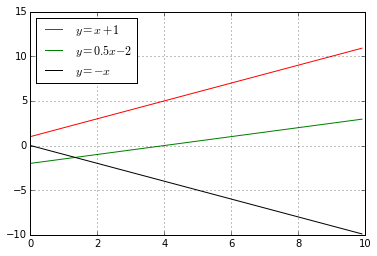

In [92]:
fig = plt.figure()      # con una funcion de pyplot creamos un objeto tipo Figure.
ax = fig.add_subplot(1, 1, 1)  # en la posicion 1-1 creamos un Subplot en nuestro objeto fig (que tendrá solo un plot)


ax.plot(x, x + 1, c='red', label=r'$y = x + 1$' )        # label usando LaTex
ax.plot(x, .5*x - 2, c='green', label=r'$y = 0.5x - 2$' )
ax.plot(x, -x, c='black', label=r'$y = -x$' )
ax.grid()
ax.legend(loc="upper left")
plt.show()

Pero también podemos tener una figura con múltiples subplots

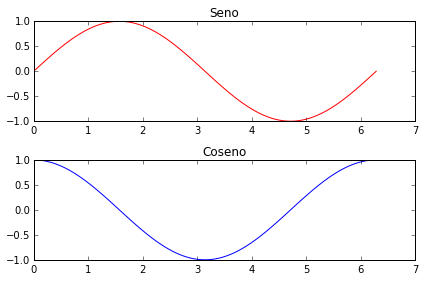

In [95]:
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)    # el plot 1 en una figura de 2x1
ax1.set_title('Seno')
ax1.plot(x, np.sin(x), c='red')
ax2 = fig.add_subplot(2, 1, 2)   # el plot 2 en una figura de 2x1
ax2.plot(x, np.cos(x), c='blue')
ax2.set_title('Coseno')
fig.tight_layout()  # ajusta el espaciado entre los subplots
plt.show()

Aunque ya la mostramos, todavia tenemos control sobre los objetos. Por ejemplo, podemos guardar la figura en un archivo

In [99]:
fig.savefig('senos.svg', format='svg')

Otra manera de crear figuras con múltiples subplots es usar la función `subplots`. Por supuesto, cada gráfico puede ser de un tipo distinto

In [100]:
from matplotlib import pyplot as plt
import numpy as np

xx = np.linspace(-0.75, 1., 100)
n = np.arange(0,6)

# devuelve la figura y la lista de subplots
fig, axes = plt.subplots(1, 5, figsize=(17,3))

# scatter grafica puntos pero no los une
axes[0].scatter(xx, xx + 0.25, c='red', marker='^')

axes[1].step(n, n**2, 'g', lw=2)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

ax = fig.add_subplot(1, 5, 5, projection='3d')
t = np.linspace(0, 2 *np.pi, 100)
ax.plot(t, t, t, color='blue', lw=3)
pyplot.show()

#### Gráficos 3D

Hacer gráficos en 3D no es el fin principal de matplotlib y por eso está en un toolkit aparte, pero es muy fácil. Primero hace falta importar la clase para el tipo Axes3D

In [101]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

Eso "parcha" la clase para que los subplot acepte la proyección 3D

In [102]:
fig = plt.figure(figsize=(10,8))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
z = np.linspace(-2, 2, 1000)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x,y,z, lw=1.5)
plt.show()

¡Matplotlib es genial! Es libre y gratis y brinda resultados excepcionales. Seguro lo usarás para tu próximo paper/poster

## Para terminar... descontracturemos

Hay un comic online que a los nerds nos gusta mucho: [XKCD](http://xkcd.com)


![](http://imgs.xkcd.com/comics/compiling.png)

![](http://www.attendly.com/wp-content/uploads/2012/09/computer_problems722.png)

![](http://imgs.xkcd.com/comics/sandwich.png)


Nos gusta tanto, que Python le rinde homenaje con un huevo de pascua




In [ ]:
import antigravity

Muchas veces, la tira tiene gráficos de este estilo

![](http://imgs.xkcd.com/comics/self_description.png)

![](https://imgs.xkcd.com/comics/fiction_rule_of_thumb.png)

![](https://imgs.xkcd.com/comics/i_dont_own_a_tv.png)

Si intentáramos hacer nuestra propia versión, arruinaríamos el chiste

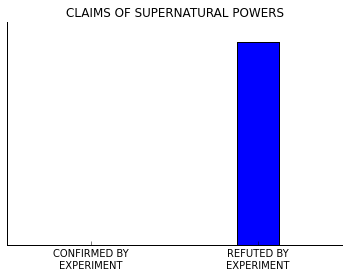

In [69]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([0, 1])
ax.set_xlim([-0.5, 1.5])
ax.set_ylim([0, 110])
ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
plt.yticks([])
plt.title("CLAIMS OF SUPERNATURAL POWERS");

¿Pero qué tal usar el modo XKCD de Matplotlib?


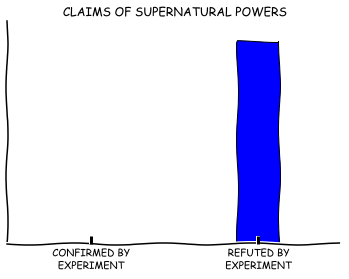

In [70]:

with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])
    plt.title("CLAIMS OF SUPERNATURAL POWERS")

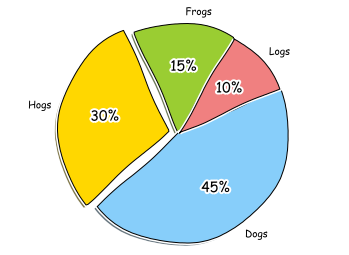

In [74]:
with plt.xkcd():
    labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
    sizes = [15, 30, 45, 10]
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.f%%', shadow=True, startangle=60)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal');

Cualquier gráfico se puede "xkcdear" ;-). http://matplotlib.org/xkcd/